In [1]:
import sys
sys.path.insert(0, '$ATHENA_DIR/vis/python')
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from pylab import *
import struct
import array
import os
from scipy.interpolate import griddata

# Athena++ modules
import athena_read
import h5py

In [3]:
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['black','cyan','magenta'])

input_filename = 'disk.out1.00010.athdf'
leveln = None

#--------------------Important global variables-------------------------#
q = 1.8e-3
Rh = (q/3)**(1/3)






quantities=['rho','press','vel1','vel2','vel3']
with h5py.File(input_filename, 'r') as f:
      attributes = f.attrs.items()
      attrs = dict(attributes)
      level = f.attrs['MaxLevel']
      time = f.attrs['Time']

subsample = False
if leveln is not None:
    if level > leveln:
        subsample = True
    level = leveln
data = athena_read.athdf(input_filename, quantities=quantities,
    level=level, subsample=subsample)

rho=data['rho']
velr=data['vel1']
velphi=data['vel3']
veltheta=data['vel2']
press=data['press']

r=data['x1f'][:-1]
theta=data['x2f'][:-1]
phi=data['x3f'][:-1]

nx1 = attrs['RootGridSize'][0] * 2**level
nx2 = attrs['RootGridSize'][1] * 2**level
nx3 = attrs['RootGridSize'][2] * 2**level


#plot rho, v and Er, B
# make plots in r-theta plane and mid-plane

x1f=data['x1f']
x2f=data['x2f']
x3f=data['x3f']


x1v=np.zeros(nx1)
x2v=np.zeros(nx2)
x3v=np.zeros(nx3)

for i in range(nx1):
    x1v[i]=0.75*(x1f[i+1]**4.0 - x1f[i]**4.0)/(x1f[i+1]**3.0-x1f[i]**3.0)

for j in range(nx2):
    x2v[j]=((np.sin(x2f[j+1]) - x2f[j+1] * np.cos(x2f[j+1])) \
        -(np.sin(x2f[j]) - x2f[j] * np.cos(x2f[j]))) \
            / (np.cos(x2f[j]) - np.cos(x2f[j+1]))

for k in range(nx3):
    x3v[k] = 0.5 * (x3f[k+1]+x3f[k])


# now the mid-plane plots

# find the position corresponding to phiplot position
rmax = max(x1f)
thetapos=np.abs(x2v-0.5*np.pi).argmin()
rmaxpos=np.abs(x1v-rmax).argmin()


rhoslice=rho[:,thetapos,:rmaxpos]
velr_slice=velr[:,thetapos,:rmaxpos]
velphi_slice=velphi[:,thetapos,:rmaxpos]
veltheta_slice=veltheta[:,thetapos,:rmaxpos]
press_slice=press[:,thetapos,:rmaxpos]

x1f=x1f[:rmaxpos+1]

#logr=np.log10(x1f)
#x1f_norm = (x1f - np.min(x1f)) / (np.max(x1f) - np.min(x1f))
xmesh,ymesh=np.meshgrid(x3f,x1f)

#PLOTS


rho_theta = rho[0, :, ::-1] # different rho_theta for different phis, it is the same for different r
rho_r = rho[0, :, ::-1].T # different rho_r for different thetas, it is the same for different phis


/var/folders/6b/q0ls5s7570d8s04fbvw5gmxw0000gn/T/ipykernel_56140/3166170838.py:12: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im=axes.pcolormesh(xmesh,ymesh,rhoslice[phiidx][:,ridx].T,cmap=cmap, norm=norm)


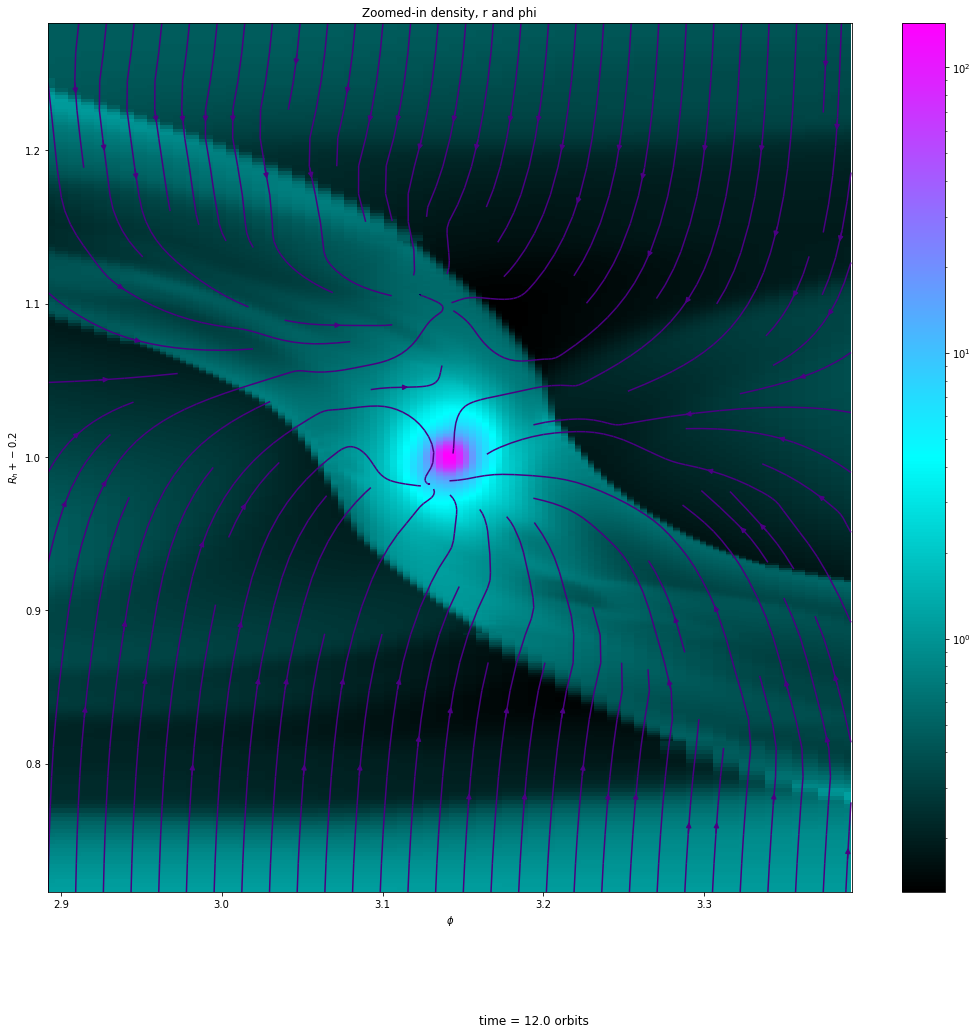

In [5]:
plots, axes = plt.subplots(figsize=(18,16))

plt.xlabel('$\\phi$')
plt.ylabel('$ R_h+-0.2$')
minval=min(rhoslice[0])
maxval=max(rhoslice[0])
ridx = np.where((x1f>1-(Rh+0.2)) & (x1f<1+(Rh+0.2)))[0]
phiidx = np.where((x3f>3.089232776029963-0.2) & (x3f<3.193952531149623+0.2))[0]

norm=matplotlib.colors.LogNorm()
xmesh,ymesh=np.meshgrid(x3f[phiidx],x1f[ridx])
im=axes.pcolormesh(xmesh,ymesh,rhoslice[phiidx][:,ridx].T,cmap=cmap, norm=norm)     

cbar=plots.colorbar(im, ax=axes)


U = velr_slice[phiidx][:,ridx].T
V = velphi_slice[phiidx][:,ridx].T

x = np.linspace(x1f[ridx][0], x1f[ridx][-1], 667)
y = np.linspace(x3f[phiidx][0], x3f[phiidx][-1], 123)

X,Y = np.meshgrid(y,x)

#  Varying density along a streamline
plt.streamplot(X,Y, U, V, color = 'indigo')

plt.margins(x=0)

plt.figtext(0.5, 0.01, 'time = '+str(time // (2*np.pi)) + ' orbits', ha="center", fontsize=12)
plt.title('Zoomed-in density, r and phi')
axes.set_aspect('auto')
#plt.style.use('dark_background')
plt.show()

/var/folders/6b/q0ls5s7570d8s04fbvw5gmxw0000gn/T/ipykernel_55071/2287739471.py:12: MatplotlibDeprecationWarning:

shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.



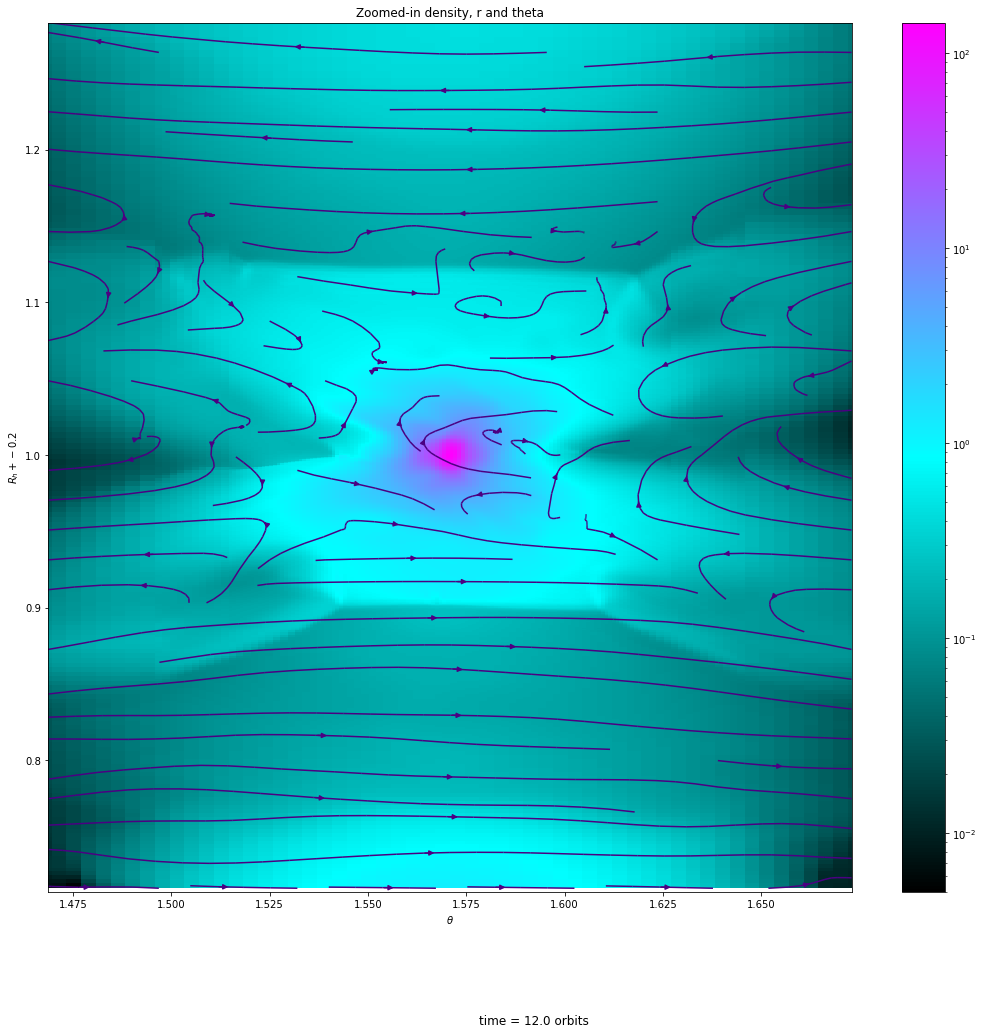

In [116]:
plots, axes = plt.subplots(figsize=(18,16))

plt.xlabel('$\\theta$')
plt.ylabel('$ R_h+-0.2$')
minval=min(rhoslice[0])
maxval=max(rhoslice[0])
ridx = np.where((x1f>1-(Rh+0.2)) & (x1f<1+(Rh+0.2)))[0]
thetaidx = np.where((x2f>1.5184364492350666-0.05) & (x2f<1.6231562043547265+0.05))[0]

norm=matplotlib.colors.LogNorm()
xmesh,zmesh=np.meshgrid(x2f[thetaidx],x1f[ridx])
im=axes.pcolormesh(xmesh,zmesh,rho[np.abs(x3v-np.pi).argmin()][thetaidx][:,ridx].T,cmap=cmap, norm=norm)     

cbar=plots.colorbar(im, ax=axes)


U = velr[np.abs(x3v-np.pi).argmin()][thetaidx][:,ridx].T
V = veltheta[np.abs(x3v-np.pi).argmin()][thetaidx][:,ridx].T

x = np.linspace(x1f[ridx][0], x1f[ridx][-1], 667)
z = np.linspace(x2f[thetaidx][0], x2f[thetaidx][-1], 219)

X,Z = np.meshgrid(z,x)

#  Varying density along a streamline
plt.streamplot(X,Z, U, V, color = 'indigo')

plt.margins(x=0)
plt.margins(y=0)

plt.figtext(0.5, 0.01, 'time = '+str(time // (2*np.pi)) + ' orbits', ha="center", fontsize=12)
plt.title('Zoomed-in density, r and theta')
axes.set_aspect('auto')
#plt.style.use('dark_background')
plt.show()

/var/folders/6b/q0ls5s7570d8s04fbvw5gmxw0000gn/T/ipykernel_56140/542766941.py:12: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im=axes.pcolormesh(xmesh,ymesh,rhoslice[phiidx][:,ridx].T,cmap=cmap, norm=norm)


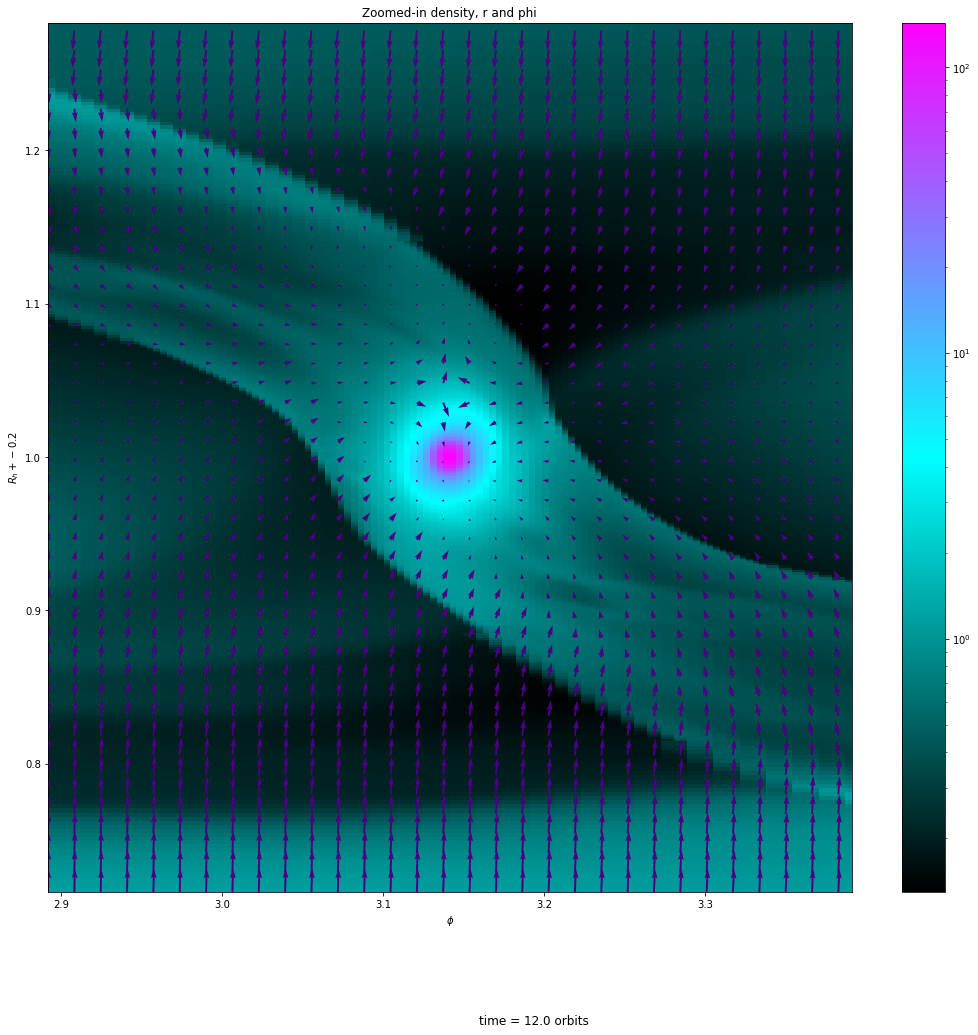

In [46]:
plots, axes = plt.subplots(figsize=(18,16))

plt.xlabel('$\\phi$')
plt.ylabel('$ R_h+-0.2$')
minval=min(rhoslice[0])
maxval=max(rhoslice[0])
ridx = np.where((x1f>1-(Rh+0.2)) & (x1f<1+(Rh+0.2)))[0]
phiidx = np.where((x3f>3.089232776029963-0.2) & (x3f<3.193952531149623+0.2))[0]

norm=matplotlib.colors.LogNorm()
xmesh,ymesh=np.meshgrid(x3f[phiidx],x1f[ridx])
im=axes.pcolormesh(xmesh,ymesh,rhoslice[phiidx][:,ridx].T,cmap=cmap, norm=norm)     

cbar=plots.colorbar(im, ax=axes)

ratex = 15
ratey = 4

U = velr_slice[phiidx][:,ridx].T[::ratex][:,::ratey]
V = velphi_slice[phiidx][:,ridx].T[::ratex][:,::ratey]

x = np.linspace(x1f[ridx][0], x1f[ridx][-1], 667)[::ratex]
y = np.linspace(x3f[phiidx][0], x3f[phiidx][-1], 123)[::ratey]

X,Y = np.meshgrid(y,x)

#  Varying density along a streamline
plt.quiver(X,Y, U, V, color = 'indigo')

plt.margins(x=0)

plt.figtext(0.5, 0.01, 'time = '+str(time // (2*np.pi)) + ' orbits', ha="center", fontsize=12)
plt.title('Zoomed-in density, r and phi')
axes.set_aspect('auto')
#plt.style.use('dark_background')
plt.show()

/var/folders/6b/q0ls5s7570d8s04fbvw5gmxw0000gn/T/ipykernel_56140/2314077005.py:12: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im=axes.pcolormesh(xmesh,zmesh,rho[np.abs(x3v-np.pi).argmin()][thetaidx][:,ridx].T,cmap=cmap, norm=norm)


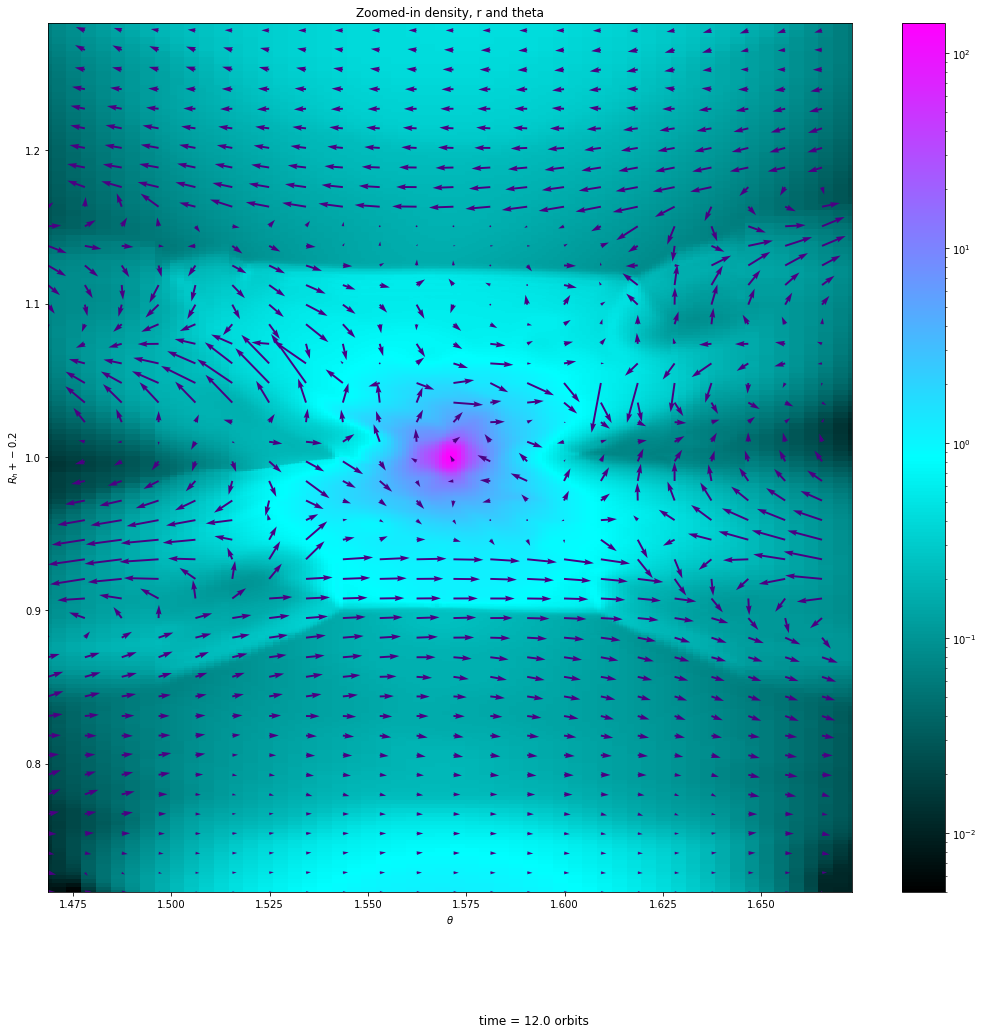

In [50]:
plots, axes = plt.subplots(figsize=(18,16))

plt.xlabel('$\\theta$')
plt.ylabel('$ R_h+-0.2$')
minval=min(rhoslice[0])
maxval=max(rhoslice[0])
ridx = np.where((x1f>1-(Rh+0.2)) & (x1f<1+(Rh+0.2)))[0]
thetaidx = np.where((x2f>1.5184364492350666-0.05) & (x2f<1.6231562043547265+0.05))[0]

norm=matplotlib.colors.LogNorm()
xmesh,zmesh=np.meshgrid(x2f[thetaidx],x1f[ridx])
im=axes.pcolormesh(xmesh,zmesh,rho[np.abs(x3v-np.pi).argmin()][thetaidx][:,ridx].T,cmap=cmap, norm=norm)     

cbar=plots.colorbar(im, ax=axes)


ratex = 15
ratez = 10

U = velr[np.abs(x3v-np.pi).argmin()][thetaidx][:,ridx].T[::ratex][:,::ratez]
V = veltheta[np.abs(x3v-np.pi).argmin()][thetaidx][:,ridx].T[::ratex][:,::ratez]

x = np.linspace(x1f[ridx][0], x1f[ridx][-1], 667)[::ratex]
z = np.linspace(x2f[thetaidx][0], x2f[thetaidx][-1], 219)[::ratez]

X,Z = np.meshgrid(z,x)

#  Varying density along a streamline
plt.quiver(X,Z, U, V, color = 'indigo')


plt.margins(x=0)
plt.margins(y=0)

plt.figtext(0.5, 0.01, 'time = '+str(time // (2*np.pi)) + ' orbits', ha="center", fontsize=12)
plt.title('Zoomed-in density, r and theta')
axes.set_aspect('auto')
#plt.style.use('dark_background')
plt.show()

In [35]:
quantities = {
    "rho": {"quantity": rho, "name": 'Density', "norm": matplotlib.colors.LogNorm()},
    "velr": {"quantity": velr, "name": 'Radial velocity', "norm": matplotlib.colors.Normalize(vmin=min(velr_slice[0]), vmax=max(velr_slice[0]))},
    "velphi": {"quantity": velphi, "name": 'Azimuthal velocity', "norm": matplotlib.colors.Normalize(vmin=min(velphi_slice[0]), vmax=max(velphi_slice[0]))},
    "press": {"quantity": press, "name": 'Pressure', "norm": matplotlib.colors.Normalize(vmin=min(press_slice[0]), vmax=max(press_slice[0]))}
}

In [44]:
quantities['rho'].get('name')

'Density'

In [55]:
def make_plots(quantity, rate=(15,10), zoom=True, projection='rt', quiver=True):
    """
    The quantity is rho/vel/press from the dictionary
    projection: rphi for r and phi
                rt for r and theta
    rate: the rate for quiver plots
    zoom: default is true 
    quiver: default is true
    """

    name = quantity.get('name')
    norm = quantity.get('norm')
    quantity = quantity.get('quantity')

    if zoom:
        plots, axes = plt.subplots(figsize=(18,18))
        if projection == 'rt':
            plt.xlabel('$\\theta$')
            plt.ylabel('$ R_h+-0.2$')

            ridx = np.where((x1f>1-(Rh+0.2)) & (x1f<1+(Rh+0.2)))[0]
            thetaidx = np.where((x2f>1.5184364492350666-0.05) & (x2f<1.6231562043547265+0.05))[0]
            xmesh,zmesh=np.meshgrid(x2f[thetaidx],x1f[ridx])

            rhoslice = quantity[np.abs(x3v-np.pi).argmin()][thetaidx][:,ridx].T
            im=axes.pcolormesh(xmesh,zmesh,rhoslice,cmap=cmap, norm=norm)    
            cbar=plots.colorbar(im, ax=axes)

            if quiver:

                ratex = rate[0]
                ratez = rate[1]

                U = velr[np.abs(x3v-np.pi).argmin()][thetaidx][:,ridx].T[::ratex][:,::ratez]
                V = veltheta[np.abs(x3v-np.pi).argmin()][thetaidx][:,ridx].T[::ratex][:,::ratez]

                x = np.linspace(x1f[ridx][0], x1f[ridx][-1], 667)[::ratex]
                z = np.linspace(x2f[thetaidx][0], x2f[thetaidx][-1], 219)[::ratez]

                X,Z = np.meshgrid(z,x)

                #  Varying density along a streamline
                plt.quiver(X,Z, U, V, color = 'indigo')
        

        if projection == 'rphi':
            plt.xlabel('$\\phi$')
            plt.ylabel('$ R_h+-0.2$')

            ridx = np.where((x1f>1-(Rh+0.2)) & (x1f<1+(Rh+0.2)))[0]
            phiidx = np.where((x3f>3.089232776029963-0.2) & (x3f<3.193952531149623+0.2))[0]

            xmesh,ymesh=np.meshgrid(x3f[phiidx],x1f[ridx])

            rhoslice = quantity[:,thetapos,:rmaxpos][phiidx][:,ridx].T
            im=axes.pcolormesh(xmesh,ymesh,rhoslice,cmap=cmap, norm=norm)
            cbar=plots.colorbar(im, ax=axes)

            if quiver:

                ratex = rate[0]
                ratey = rate[1]

                U = velr_slice[phiidx][:,ridx].T[::ratex][:,::ratey]
                V = velphi_slice[phiidx][:,ridx].T[::ratex][:,::ratey]

                x = np.linspace(x1f[ridx][0], x1f[ridx][-1], 667)[::ratex]
                y = np.linspace(x3f[phiidx][0], x3f[phiidx][-1], 123)[::ratey]

                X,Y = np.meshgrid(y,x)
                #  Varying density along a streamline
                plt.quiver(X,Y, U, V, color = 'indigo')
        
        plt.title('Zoomed-in {}, r and theta'.format(name))

    else:
        projection = None
        plots, axes = plt.subplots(figsize=(18,18),subplot_kw=dict(projection='polar'))

        plt.xlabel('$\\phi$')
        plt.ylabel('$ r$')

        xmesh,ymesh=np.meshgrid(x3f,x1f)

        rhoslice = quantity[:,thetapos,:rmaxpos].T
        im=axes.pcolormesh(xmesh,ymesh,rhoslice,cmap=cmap, norm=norm)

        cbar=plots.colorbar(im, ax=axes)

        # Turn off tick labels
        axes.set_yticklabels([])
        axes.set_xticklabels([])
        
        plt.title(name)
        axes.set_aspect('auto')

    plt.margins(x=0)
    plt.margins(y=0)

    plt.figtext(0.5, 0.01, 'time = {:.2f} orbits'.format(time / (2*np.pi)), ha="center", fontsize=12)
    axes.set_aspect('auto')
    # plt.style.use('dark_background')
    plt.show()

/var/folders/6b/q0ls5s7570d8s04fbvw5gmxw0000gn/T/ipykernel_58828/2153074862.py:56: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im=axes.pcolormesh(xmesh,ymesh,rhoslice,cmap=cmap, norm=norm)


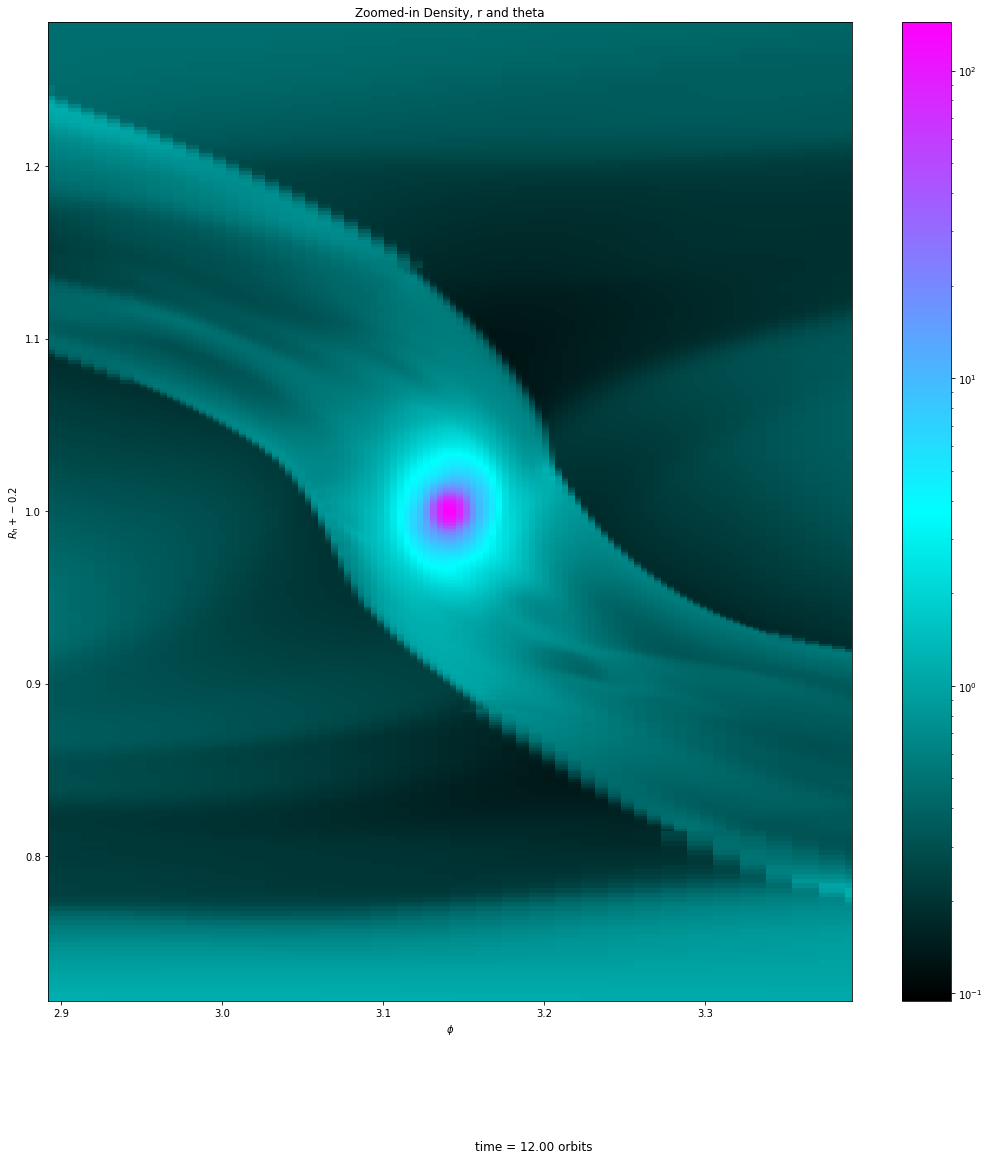

In [56]:
make_plots(quantities['rho'],zoom=True, projection='rphi', quiver=False)